### Part 1

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Who were the passengers of Titanic?

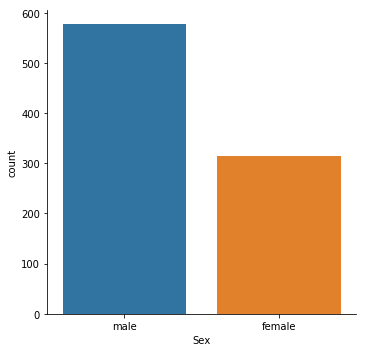

In [14]:
sns.catplot('Sex', data=titanic_df, kind="count")

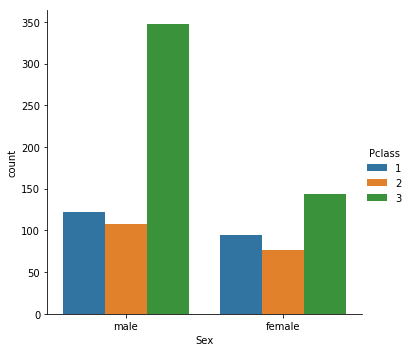

In [15]:
sns.catplot('Sex', data=titanic_df, kind="count", hue='Pclass')

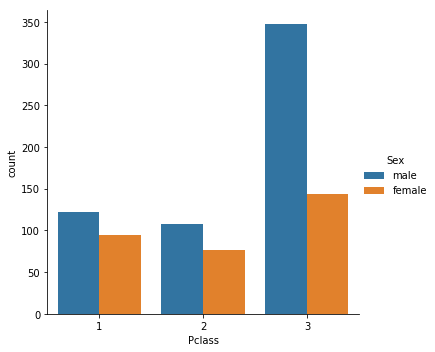

In [16]:
sns.catplot('Pclass', data=titanic_df, kind="count", hue='Sex')

In [6]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [7]:
titanic_df['person'] = titanic_df[['Age', 
                                   'Sex']].apply(male_female_child, axis=1)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female


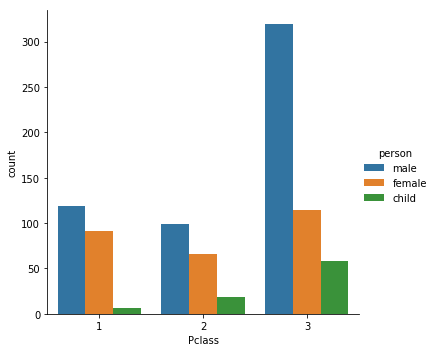

In [24]:
sns.catplot('Pclass', data=titanic_df, kind="count", hue='person')

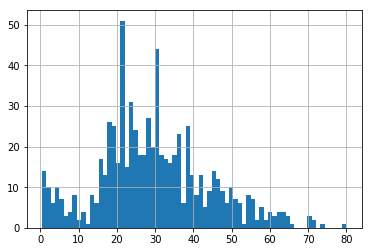

In [25]:
titanic_df['Age'].hist(bins=70)

In [26]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [28]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Part 2

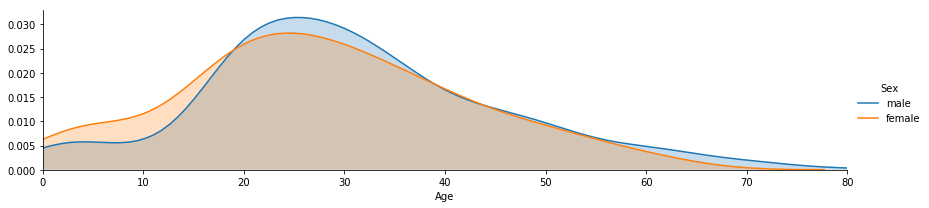

In [40]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

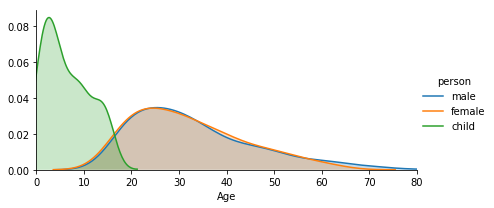

In [44]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=2)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

#### Passenger accomodation

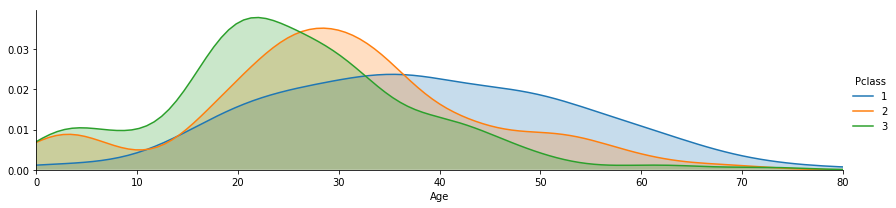

In [45]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [139]:
deck = titanic_df['Cabin'].dropna()

In [140]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

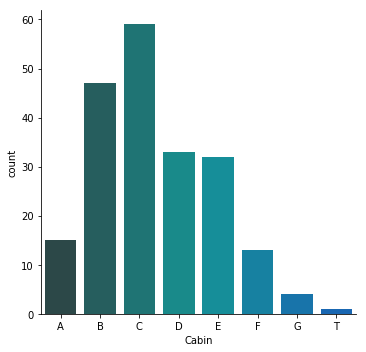

In [74]:
levels = [level[0] for level in deck]

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.catplot('Cabin', data=cabin_df, kind="count", 
            palette='winter_d', order=sorted(list(set(cabin_df['Cabin']))) )


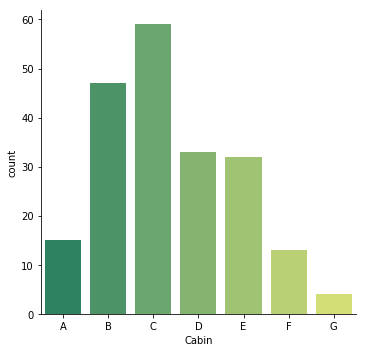

In [76]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']


sns.catplot('Cabin', data=cabin_df, kind="count", 
            palette='summer', order=sorted(list(set(cabin_df['Cabin']))) )

#### Where the passengers came from?

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


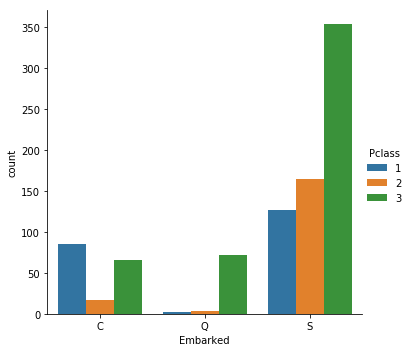

In [82]:
sns.catplot('Embarked', data=titanic_df, 
            kind="count", hue='Pclass', order=['C','Q','S'])

### Part 3

#### Who was alone & who was with family?

In [96]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


In [10]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [11]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\Алексей\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


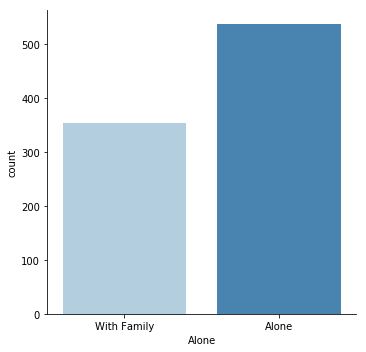

In [12]:
sns.catplot('Alone',data=titanic_df,kind="count",palette='Blues')

#### What helped to survive?

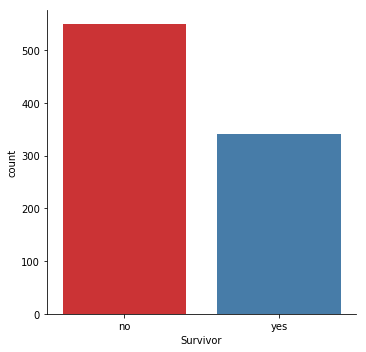

In [8]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor',data=titanic_df,kind="count",palette='Set1')

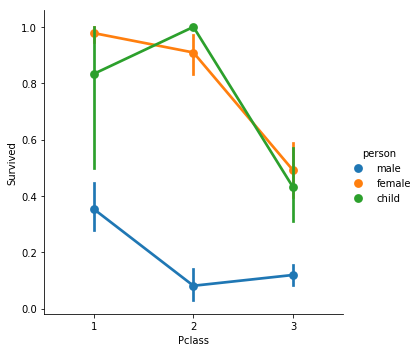

In [127]:
sns.catplot("Pclass","Survived", hue='person', data=titanic_df, kind="point")

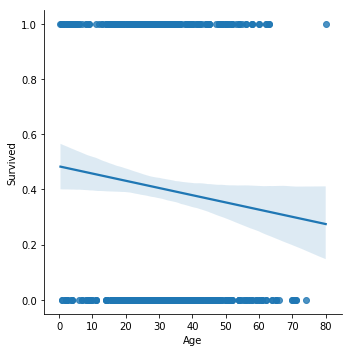

In [128]:
sns.lmplot("Age","Survived",data=titanic_df)

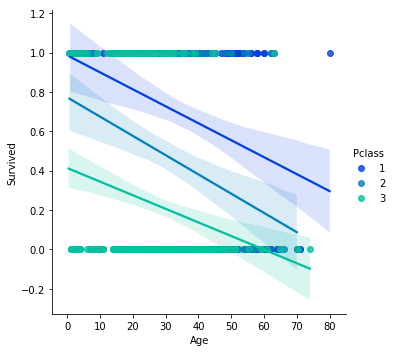

In [129]:
sns.lmplot("Age","Survived", hue='Pclass', data=titanic_df, palette='winter')

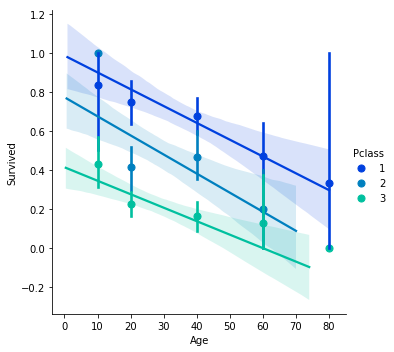

In [17]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', 
          data=titanic_df, palette='winter', x_bins=generations)

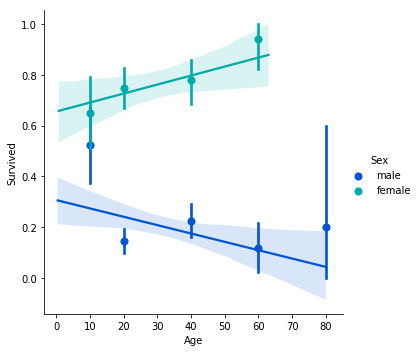

In [133]:
sns.lmplot('Age','Survived', hue='Sex', 
           data=titanic_df, palette='winter', x_bins=generations)

### Part 4

#### Deck -> passenger's survival rate?

In [13]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes


In [14]:
pas_deck = titanic_df[['Cabin', 'Survivor', 'person']].dropna().copy()
pas_deck['Cabin'] = pas_deck['Cabin'].astype(str).str[0]
pas_deck = pas_deck[(pas_deck.Cabin != 'T') & (pas_deck.Cabin != 'G')]
pas_deck['Survived'] = pas_deck['Survivor'].map({'no': 0, 'yes': 1})
#pas_deck = pas_deck[pas_deck.person == 'male']

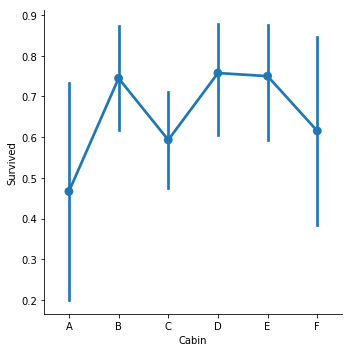

In [15]:
sns.catplot("Cabin","Survived", data=pas_deck.sort_values(by='Cabin'), kind="point")

#### Family member -> surivng?

Text(0.5, 0.98, 'All the passengers')

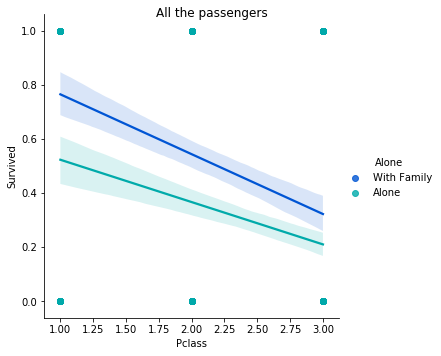

In [30]:
sns.lmplot('Pclass','Survived', hue='Alone', 
           data=titanic_df, palette='winter').fig.suptitle('All the passengers')

Text(0.5, 0.98, 'All the kids were with family')

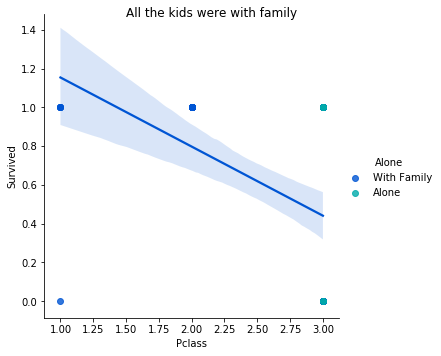

In [34]:
sns.lmplot('Pclass','Survived', hue='Alone', 
           data=titanic_df[titanic_df.person == 'child'], palette='winter').fig.suptitle('All the kids were with family')

Text(0.5, 0.98, 'Adults')

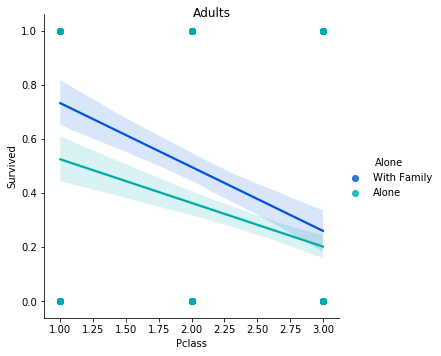

In [35]:
sns.lmplot('Pclass','Survived', hue='Alone', 
           data=titanic_df[titanic_df.person != 'child'], palette='winter').fig.suptitle("Adults")

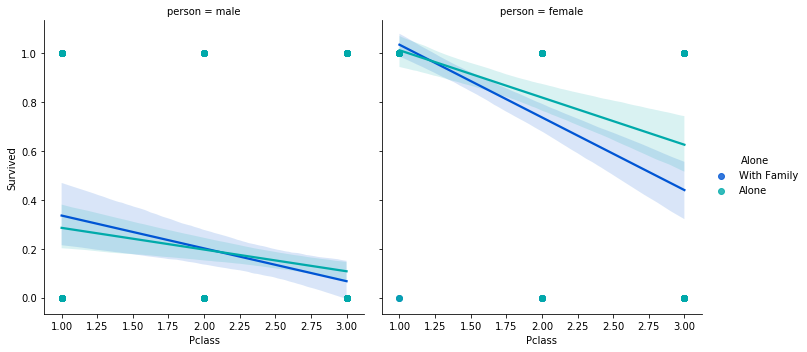

In [14]:
sns.lmplot('Pclass','Survived', hue='Alone', col='person',
           data=titanic_df[titanic_df.person != 'child'], palette='winter')